In [41]:
from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END

In [42]:
class AgentState(TypedDict):
    """ State for the agent. """

    num1: float
    num2: float
    num3: float
    num4: float
    operation1: str
    operation2: str
    operation3: str
    mid: float
    mid2: float
    final: float


In [48]:
def add(state: AgentState) -> AgentState:
    state['mid'] = state['num1'] + state['num2']
    return state


def add2(state: AgentState) -> AgentState:
    state['mid2'] = state['num3'] + state['num4']
    return state


def subtract(state: AgentState) -> AgentState:
    state['mid'] = state['num1'] - state['num2']
    return state


def subtract2(state: AgentState) -> AgentState:
    state['mid2'] = state['num3'] - state['num4']
    return state


def add3(state: AgentState) -> AgentState:
    """ Perform addition on the final two numbers."""
    state['final'] = state['mid'] + state['mid2']
    return state


def subtract3(state: AgentState) -> AgentState:
    """ Perform subtraction on the final two numbers."""
    state['final'] = state['mid'] - state['mid2']
    return state

In [49]:
def router1(state: AgentState) -> str:
    return 'add1' if state['operation1'] == '+' else 'sub1'


def router2(state: AgentState) -> str:
    return 'add2' if state['operation2'] == '+' else 'sub2'


def router3(state: AgentState) -> str:
    return 'add3' if state['operation3'] == '+' else 'sub3'


In [54]:
# Create the graph
graph = StateGraph(AgentState)

# Add operation nodes with correct function references
graph.add_node('add1', add)
graph.add_node('sub1', subtract)
graph.add_node('add2', add2)
graph.add_node('sub2', subtract2)
graph.add_node('add3', add3)
graph.add_node('sub3', subtract3)

# Add router nodes
graph.add_node('router1', lambda state: state)
graph.add_node('router2', lambda state: state)
graph.add_node('router3', lambda state: state)

# Sequential execution: Start with first operation
graph.add_edge(START, 'router1')

# Conditional routing for first operation
graph.add_conditional_edges('router1', router1, {
    'add1': 'add1',
    'sub1': 'sub1'
})

# After first operation, go to second operation
graph.add_edge('add1', 'router2')
graph.add_edge('sub1', 'router2')

# Conditional routing for second operation
graph.add_conditional_edges('router2', router2, {
    'add2': 'add2',
    'sub2': 'sub2'
})

# After second operation, go to final operation
graph.add_edge('add2', 'router3')
graph.add_edge('sub2', 'router3')

# Conditional routing for final operation
graph.add_conditional_edges('router3', router3, {
    'add3': 'add3',
    'sub3': 'sub3'
})

# End points
graph.add_edge('add3', END)
graph.add_edge('sub3', END)

# Compile the graph
app = graph.compile()

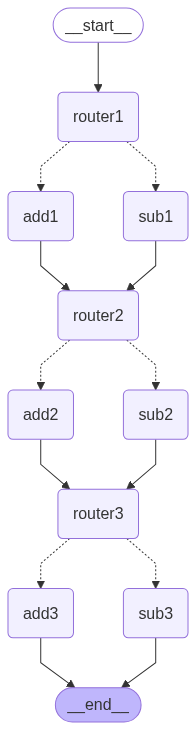

In [55]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [56]:
def test_calculator():
    # Test case: (5 + 3) - (10 - 2) = 8 - 8 = 0
    state = {
        'num1': 5.0,
        'num2': 3.0,
        'num3': 10.0,
        'num4': 2.0,
        'operation1': '+',  # 5 + 3 = 8
        'operation2': '-',  # 10 - 2 = 8  
        'operation3': '-',  # 8 - 8 = 0
        'mid': 0.0,
        'mid2': 0.0,
        'final': 0.0
    }

    result = app.invoke(state)
    print(
        f"({state['num1']} {state['operation1']} {state['num2']}) {state['operation3']} ({state['num3']} {state['operation2']} {state['num4']}) = {result['final']}"
    )
    return result


In [57]:
# Run the test
if __name__ == "__main__":
    test_result = test_calculator()


(5.0 + 3.0) - (10.0 - 2.0) = 0.0
